In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib.textpath import TextPath
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram

In [2]:
df = pd.read_csv('../dataset/movies_complete.csv')
#dfs is the original dataframe without slicing, since df would be used as a sliced dataframe later on 
dfs = df.sample(frac=1)
dfs.shape


(3728, 56)

## Visualisation of the Dataframe

### Original Dataframe

In [3]:
print(dfs.shape)
dfs.head()

(3728, 56)


,Unnamed: 0,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,...,Ratings,Metascore,imdbRating,imdbVotes,Type,DVD,BoxOffice,Production,Website,Response
481,481,6750014.xml,"Hier steht , dass Sie gut Englisch sprechen . ...",tt1318061,Drama,2009.0,French,untokenisiert,103.0,nm1360317,...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,6.3,292,movie,NaN,NaN,NaN,NaN,True
3723,3723,7007863.xml,"Niemand weiß , wann die Welt zu dem wurde , wa...",tt6574146,"Animation,Sci-Fi",2017.0,NaN,untokenisiert,106.0,nm2670218,...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,6.7,"6,466",movie,20 May 2017,NaN,Netflix,NaN,True
2679,2679,5785085.xml,Weitere Nachrichten . In den frühen Morgenstun...,tt2630336,"Action,Crime,Drama",2014.0,Japanese,untokenisiert,119.0,"nm0960025,nm0766226",...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,6.2,"1,553",movie,02 May 2017,NaN,C&amp;I Entertainment,NaN,True
409,409,6790598.xml,Mittlerweile gibt es 13 vermisste Personen in ...,tt1230211,"Horror,Thriller",2009.0,English,untokenisiert,95.0,nm0801916,...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,5.0,"2,109",movie,31 Mar 2009,NaN,After Dark Films,NaN,True
1675,1675,5067133.xml,Es ist die erste Massenbewegung in der Geschic...,tt1934234,Drama,2012.0,"Italian, German, French, English, Spanish",untokenisiert,127.0,nm0895835,...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,7.3,"3,266",movie,NaN,NaN,Fandango,NaN,True


In [4]:
df.columns


Index(['Unnamed: 0', 'filename', 'text', 'IMDB_ID', 'genre', 'year',
       'production_region', 'corpus', 'duration', 'directors', 'writers',
       'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear',
       'endYear', 'runtimeMinutes', 'averageRating', 'numVotes',
       'mean_sentence_length', 'type_token_ratio', 'text_length',
       'originalTitleLang', 'lemma', 'pos', 'tag', 'dep', 'shape', 'ent_text',
       'ent_label', 'imdbID', 'Title', 'Year', 'Rated', 'Released', 'Runtime',
       'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country',
       'Awards', 'Poster', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes',
       'Type', 'DVD', 'BoxOffice', 'Production', 'Website', 'Response'],
      dtype='object')

In [5]:
# df.drop(['Unnamed: 0', 'filename', 'IMDB_ID', 'production_region', 'corpus', 'duration', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult','endYear', 'startYear', 'numVotes', 'mean_sentence_length', 'type_token_ratio', 'text_length', 'originalTitleLang', 'lemma', 'pos', 'tag', 'dep', 'shape', 'ent_text','ent_label', 'imdbID', 'Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Country', 'Awards', 'Poster', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'Type', 'DVD', 'BoxOffice', 'Production', 'Website', 'Response'], axis=1).head()
df = df[['text','writers', 'genre', 'directors', 'Language', 'year', 'runtimeMinutes', 'averageRating']]
print(df.shape)
df.head()

(3728, 8)


,text,writers,genre,directors,Language,year,runtimeMinutes,averageRating
0,Der Roman von Alexandre Dumas dem Älteren hatt...,"nm0241416,nm0816458,nm0763376,nm0812731","Adventure,Drama,History","nm0894509,nm0148602",French,1943.0,90.0,7.0
1,Hände hoch oder ich schieße ( 1966 ) dTV - MDR...,"nm0440757,nm0833141,nm1127102",Comedy,nm0440757,German,1966.0,75.0,5.8
2,"Hallo , Manuela ? Störe ich ? Kann ich zu dir ...",nm0816215,Drama,nm0816215,French,1967.0,78.0,7.0
3,Dein Vater war ein ausgezeichneter Kämpfer . A...,NaN,"Action,Adventure",nm1172472,Korean,1978.0,82.0,6.2
4,"Na los , iss jetzt schnell auf . Junge , ist d...","nm0032816,nm0793999,nm0814232",Action,nm0814232,Japanese,1979.0,96.0,5.7


### **Dataframe without NaN in text, genre, year and production_region**

In [6]:
df.dropna(subset=['writers', 'genre', 'directors', 'Language', 'year', 'runtimeMinutes', 'averageRating'], inplace=True)
print(df.shape)

(3641, 8)


### Main Language & genre

In [7]:
#main language
df['main_language'] = df.Language.str.split(',')
main = df['main_language']
main_language = main.apply(lambda x: x[0])
df['main_language'] = main_language

#number of languages
df['number_of_languages']= df['Language'].str.split(',').apply(len)

#main genre
df['main_genre'] = df.genre.str.split(',')
main = df['main_genre']
main_genre = main.apply(lambda x: x[0])
df['main_genre'] = main_genre

#number of genres
df['number_of_genres']= df['genre'].str.split(',').apply(len)

df.head()

,text,writers,genre,directors,Language,year,runtimeMinutes,averageRating,main_language,number_of_languages,main_genre,number_of_genres
0,Der Roman von Alexandre Dumas dem Älteren hatt...,"nm0241416,nm0816458,nm0763376,nm0812731","Adventure,Drama,History","nm0894509,nm0148602",French,1943.0,90.0,7.0,French,1,Adventure,3
1,Hände hoch oder ich schieße ( 1966 ) dTV - MDR...,"nm0440757,nm0833141,nm1127102",Comedy,nm0440757,German,1966.0,75.0,5.8,German,1,Comedy,1
2,"Hallo , Manuela ? Störe ich ? Kann ich zu dir ...",nm0816215,Drama,nm0816215,French,1967.0,78.0,7.0,French,1,Drama,1
4,"Na los , iss jetzt schnell auf . Junge , ist d...","nm0032816,nm0793999,nm0814232",Action,nm0814232,Japanese,1979.0,96.0,5.7,Japanese,1,Action,1
5,Was geht auf diesem Land von Fluss Ganga heutz...,"nm3485154,nm0030116,nm0385758,nm1178697","Action,Crime,Drama",nm0385758,Hindi,1991.0,154.0,3.4,Hindi,1,Action,3


In [52]:
#monolingual vs multilingual
df['lingual'] = df['Language'].str.split(',').apply(len)

x = []
for x in df.lingual:
    if x == 1:
        print('Monolingual')
    else:
        x.append('Multilingual')

df.lingual = x

df.head()


SyntaxError: 'return' outside function (<ipython-input-52-b34b8de8a4b8>, line 7)

In [22]:
X = df.iloc[:,5:7]
model = KMeans(n_clusters=2)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
model.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [24]:
model.predict(X)

array([1, 1, 1, ..., 1, 1, 1])

In [44]:
#calculating pca on the data
pca = PCA(n_components=2)
pca.fit(X)
X_tf = pca.transform(X)
df['pca2d_1'] = X_tf[:,0]
df['pca2d_2'] = X_tf[:,1]
df['kmeans'] = model.labels_

number_of_languages = set(df.number_of_languages)
colors  = dict( Single ='blue', ='red')

plt.figure(figsize=(12,8))
for d in df.iterrows():
    x = d[1].pca2d_1
    y = d[1].pca2d_2    
    plt.plot(x, y, 'o', markersize=15, color=colors[d[1].main_language])
    plt.plot(x, y, marker=TextPath((-3, -3), f'{d[1].kmeans}'), color='white', markersize=12)


KeyError: 'French'

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Visualization of raw data')

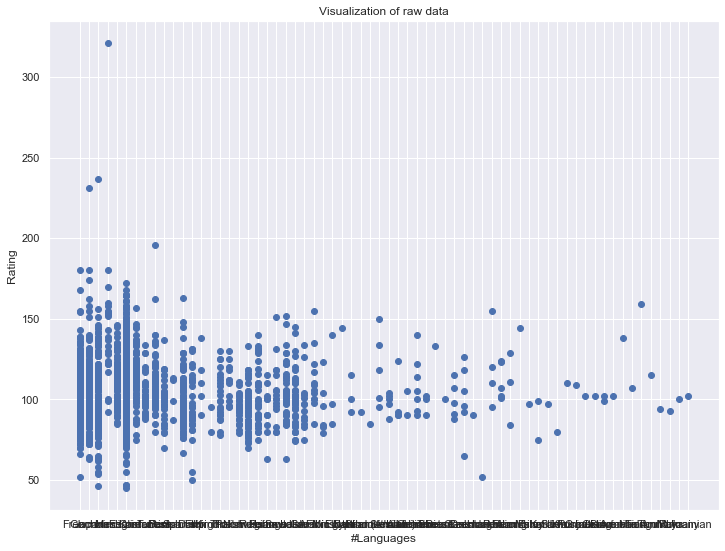

In [8]:
plt.figure(figsize = (12,9))
plt.scatter(df.iloc[:, 8], df.iloc[:, 6])
plt.xlabel('#Languages')
plt.ylabel('Rating')
plt.title('Visualization of raw data')

red     2391
blue    1250
Name: colors, dtype: int64

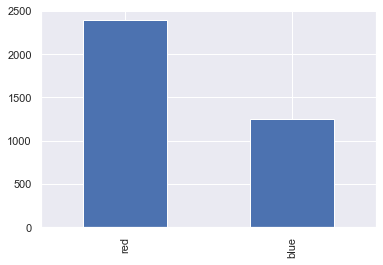

In [15]:
colors = []
for x in df.number_of_languages:
    if x == 1:
        colors.append('red')
    elif x >> 1:
        colors.append('blue')
    else: 
        colors.append('white')
df['colors']=colors
      
df_clean = df[df.colors != 'white']
pd.value_counts(df_clean.colors).plot.bar() 
pd.value_counts(df_clean.colors)

In [16]:
tfidf = TfidfVectorizer(max_features=1000)
tokens = tfidf.fit_transform(df_clean.text)

In [17]:
models = KMeans(n_clusters=2)
models.fit(tokens)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

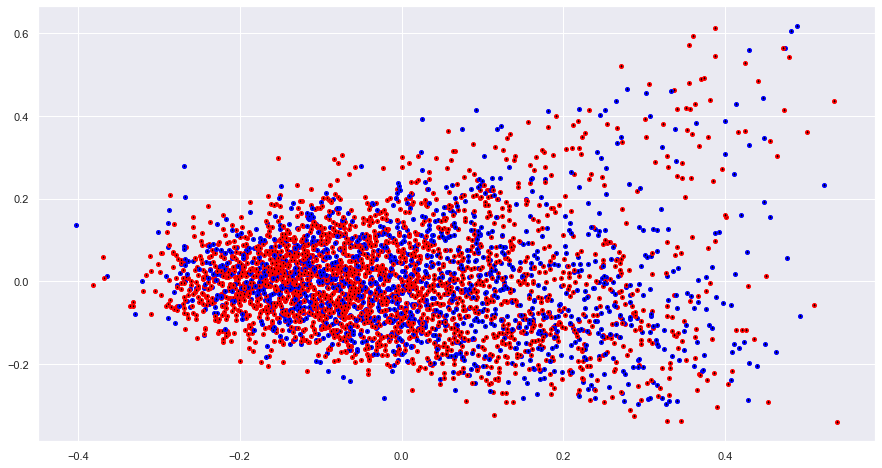

In [18]:
pca = PCA(n_components=2)
pca.fit(tokens.todense())
X_tf = pca.transform(tokens.todense())

#Saving the temporal results into Dataframe
df_clean['pcatokens_1'] = X_tf[:,0]
df_clean['pcatokens_2'] = X_tf[:,1]

df_clean['kmeanstokens'] = models.labels_

#Plot based on temporal results 
plt.figure(figsize=(15,8))
for d in df_clean.iterrows():
    a = d[1].pcatokens_1
    b = d[1].pcatokens_2
    
    plt.plot(a, b, 'o', markersize=4, color= d[1].colors)
    plt.plot(a, b, marker=TextPath((-3, -3), f'{d[1].kmeanstokens}'), color='black', markersize=1)

In [ ]:
import plotly.graph_objects as go
import plotly.express as px


fig = go.Figure(data=go.Scatter(x=Xr_pca[:, 0],
                                y=Xr_pca[:, 1],
                                mode='markers',
                                marker_color=single_genres_colors,
                                text=text_data))


fig.show()

### Number of Languages

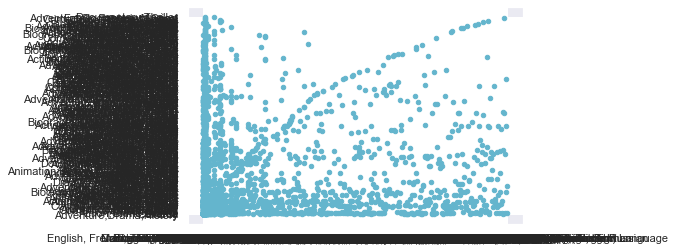

In [18]:
plt.scatter(df.Language, df.genre, s =20, c = "c", marker = "o", alpha = 1)
plt.show()

,Unnamed: 0,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,...,imdbVotes,Type,DVD,BoxOffice,Production,Website,Response,main_language,number_of_languages,colors
0,0,6416324.xml,Der Roman von Alexandre Dumas dem Älteren hatt...,tt1104767,"Adventure,Drama,History",1943.0,French,untokenisiert,90.0,"nm0894509,nm0148602",...,76,movie,NaN,NaN,NaN,NaN,True,French,1,red
1,1,4732286.xml,Hände hoch oder ich schieße ( 1966 ) dTV - MDR...,tt1631717,Comedy,1966.0,German,untokenisiert,75.0,nm0440757,...,19,movie,NaN,NaN,NaN,NaN,True,German,1,red
2,2,6122081.xml,"Hallo , Manuela ? Störe ich ? Kann ich zu dir ...",tt1271979,Drama,1967.0,French,untokenisiert,78.0,nm0816215,...,25,movie,NaN,NaN,NaN,NaN,True,French,1,red
4,4,5618549.xml,"Na los , iss jetzt schnell auf . Junge , ist d...",tt1065116,Action,1979.0,Japanese,untokenisiert,96.0,nm0814232,...,32,movie,NaN,NaN,NaN,NaN,True,Japanese,1,red
5,5,4208202.xml,Was geht auf diesem Land von Fluss Ganga heutz...,tt1454012,"Action,Crime,Drama",1991.0,Hindi,untokenisiert,154.0,nm0385758,...,25,movie,18 Mar 2008,NaN,NaN,NaN,True,Hindi,1,red


## Plot Language & Main Language

### Plot Language

English                                      1410
French                                        208
German                                        192
Japanese                                      116
English, Spanish                               92
                                             ... 
Swedish, Spanish                                1
Italian, German, French, English, Spanish       1
English, Irish, French                          1
German, Estonian, French, Russian               1
English, Lao, Thai                              1
Name: Language, Length: 711, dtype: int64

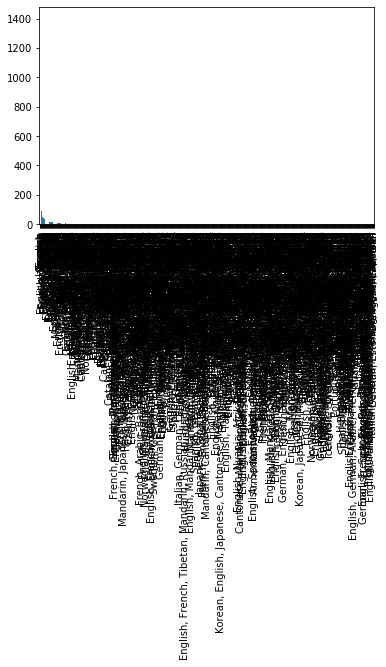

In [11]:
pd.value_counts(df['Language']).plot.bar()
pd.value_counts(df.Language)

### Plot Main Language

English        2036
French          353
German          302
Japanese        143
Spanish         113
               ... 
Tamil             1
Croatian          1
Greenlandic       1
Saami             1
Romany            1
Name: main_language, Length: 66, dtype: int64

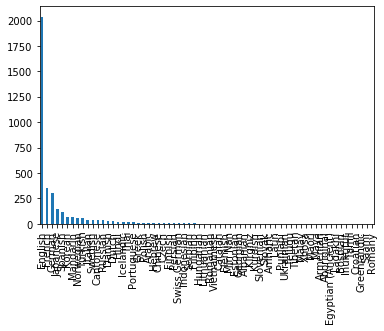

In [12]:
pd.value_counts(df['main_language']).plot.bar()
pd.value_counts(df.main_language)

### Plot Number of Languages

1     2391
2      703
3      344
4      115
5       59
6       23
7        5
10       1
Name: number_of_languages, dtype: int64

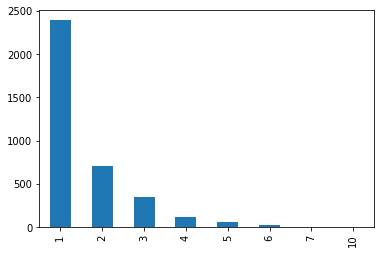

In [20]:
pd.value_counts(df['number_of_languages']).plot.bar()
pd.value_counts(df.number_of_languages) 

### Plot number of Languages (Single vs Multiple)

red     2391
blue    1250
Name: colors, dtype: int64

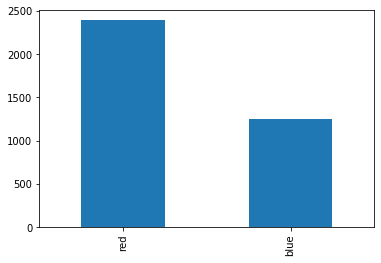

In [22]:
colors = []
for x in df.number_of_languages:
    if x == 1:
        colors.append('red')
    elif x >> 1:
        colors.append('blue')
df['colors']=colors
      
df_clean = df[df.colors != 'white']
pd.value_counts(df_clean.colors).plot.bar() 
pd.value_counts(df_clean.colors)

# Plot Main Language (the first language mentioned on each rows)

In [13]:
from collections import Counter
main_language_frequs = Counter(df.main_language)
print('There are', len(main_language_frequs), 'main languages are spoken in the Movies')
main_language_frequs.most_common(20)



There are 66 main languages are spoken in the Movies


[('English', 2036),
 ('French', 353),
 ('German', 302),
 ('Japanese', 143),
 ('Spanish', 113),
 ('Korean', 72),
 ('Mandarin', 69),
 ('Norwegian', 56),
 ('Turkish', 55),
 ('Italian', 40),
 ('Cantonese', 36),
 ('Swedish', 36),
 ('Russian', 34),
 ('Danish', 33),
 ('Dutch', 32),
 ('Hindi', 23),
 ('Icelandic', 23),
 ('Thai', 22),
 ('Portuguese', 16),
 ('Greek', 13)]

In [15]:
df.main_language.unique()
print(df.main_language.unique())

['French' 'German' 'Japanese' 'Hindi' 'Mandarin' 'English' 'Korean'
 'Cantonese' 'Turkish' 'Danish' 'Romanian' 'Spanish' 'Dutch' 'Filipino'
 'Kirghiz' 'Thai' 'Polish' 'Icelandic' 'Norwegian' 'Russian' 'Hebrew'
 'Portuguese' 'Swedish' 'Italian' 'Greek' 'Arabic' 'Finnish' 'Min Nan'
 'Latin' 'Catalan' 'Saami' 'Egyptian (Ancient)' 'Indonesian' 'Serbian'
 'Lithuanian' 'Albanian' 'Chinese' 'Vietnamese' 'Tibetan' 'Bosnian'
 'Swiss German' 'Czech' 'Greenlandic' 'Ladakhi' 'Hungarian' 'Persian'
 'Flemish' 'Aboriginal' 'Malay' 'Estonian' 'Kurdish' 'Slovak' 'Xhosa'
 'Punjabi' 'Croatian' 'Inuktitut' 'Georgian' 'Slovenian' 'Armenian'
 'Maori' 'Telugu' 'Tamil' 'Amharic' 'Maya' 'Romany' 'Ukrainian']


# Language

In [16]:
df.Language.unique()
print(df.Language.unique())

['French' 'German' 'Japanese' 'Hindi' 'Mandarin' 'English' 'Korean'
 'Cantonese, English, Thai, Mandarin' 'Turkish' 'Danish' 'Romanian'
 'Spanish' 'Dutch' 'Filipino, Tagalog' 'Kirghiz' 'Thai, English'
 'Polish, Italian' 'Icelandic' 'Japanese, Mandarin' 'French, Italian'
 'Thai' 'Thai, French' 'French, Arabic' 'English, Hindi, French, German'
 'Norwegian, Urdu' 'Spanish, French' 'English, Russian' 'Russian'
 'Norwegian, German, English, Russian, Finnish' 'English, German'
 'English, Serbo-Croatian' 'English, German, Russian'
 'English, Spanish, Russian' 'German, Russian, Georgian' 'Hebrew'
 'French, German, Latin' 'Norwegian' 'Portuguese, Mandarin, Japanese'
 'Japanese, Italian' 'Swedish' 'English, Spanish'
 'French, Bambara, Spanish' 'French, English' 'English, Korean, Estonian'
 'Italian' 'Spanish, Bable, English' 'Greek' 'Spanish, Korean, Russian'
 'English, Klingon' 'English, Cantonese' 'Icelandic, Spanish'
 'English, Italian' 'Arabic, English, Hebrew' 'Dutch, French'
 'French, Germ

In [17]:
from collections import Counter
languages_combination_frequs = Counter(df.Language)
languages_combination_frequs.most_common(20)

[('English', 1410),
 ('French', 208),
 ('German', 192),
 ('Japanese', 116),
 ('English, Spanish', 92),
 ('Spanish', 77),
 ('English, French', 51),
 ('Korean', 50),
 ('Turkish', 45),
 ('French, English', 45),
 ('Mandarin', 35),
 ('German, English', 29),
 ('English, Russian', 28),
 ('English, German', 26),
 ('Norwegian', 25),
 ('Danish', 21),
 ('Dutch', 21),
 ('Italian', 21),
 ('English, Japanese', 21),
 ('Russian', 20)]

In [19]:
lang = df.Language
lang.head(30)

0                                 French
1                                 German
2                                 French
4                               Japanese
5                                  Hindi
6                               Mandarin
7                               Japanese
8                               Japanese
9                               Japanese
10                                French
11                              Japanese
12                              Japanese
13                               English
14                                French
15                                Korean
16    Cantonese, English, Thai, Mandarin
17                              Japanese
18                              Japanese
19                               Turkish
20                              Japanese
21                                French
22                                Danish
23                               English
24                               English
25              

In [24]:
tokens.toarray(), tokens.shape

(array([[0.08444237, 0.01561686, 0.02935585, ..., 0.03394433, 0.02329053,
         0.1781093 ],
        [0.12505525, 0.03957431, 0.02796615, ..., 0.03072055, 0.01967333,
         0.07164168],
        [0.03910595, 0.02892918, 0.02862091, ..., 0.01429082, 0.02157207,
         0.13394817],
        ...,
        [0.05163668, 0.00350157, 0.01558916, ..., 0.01729752, 0.02262929,
         0.07509184],
        [0.05874277, 0.00919257, 0.02046289, ..., 0.03859907, 0.01028215,
         0.14001163],
        [0.08045383, 0.00935265, 0.03932519, ..., 0.03696115, 0.03719539,
         0.06837588]]),
 (3641, 100))

In [25]:
import seaborn as sns
import umap

In [26]:
from umap import UMAP 
reducer = UMAP()
Xr_tfidf = reducer.fit_transform(tokens)

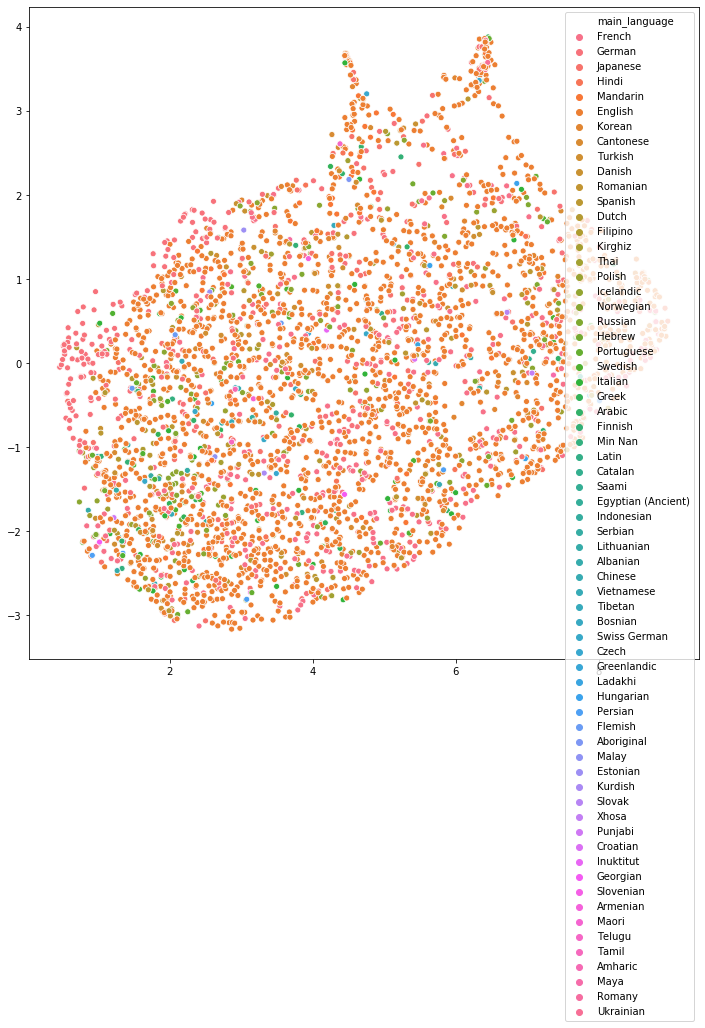

In [27]:
plt.figure(figsize=(12,12))
sns.scatterplot(Xr_tfidf[:,0], Xr_tfidf[:,1], hue=df['main_language'])
plt.show()

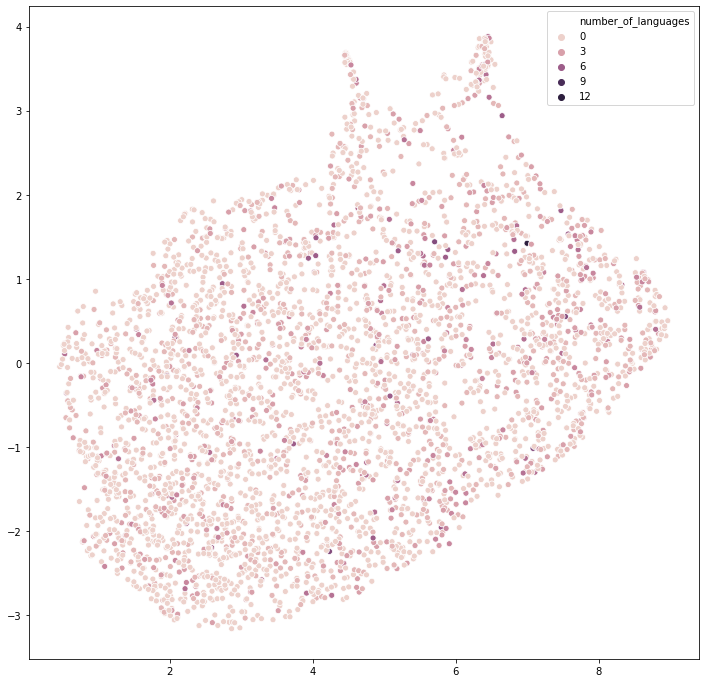

In [33]:
plt.figure(figsize=(12,12))
sns.scatterplot(Xr_tfidf[:,0], Xr_tfidf[:,1], hue=df['number_of_languages'])
plt.show()

In [32]:
models = KMeans(n_clusters=2)
models.fit(tokens)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
from umap import UMAP 
reducer = UMAP()
Xr_tfidf = reducer.fit_transform(tokens)

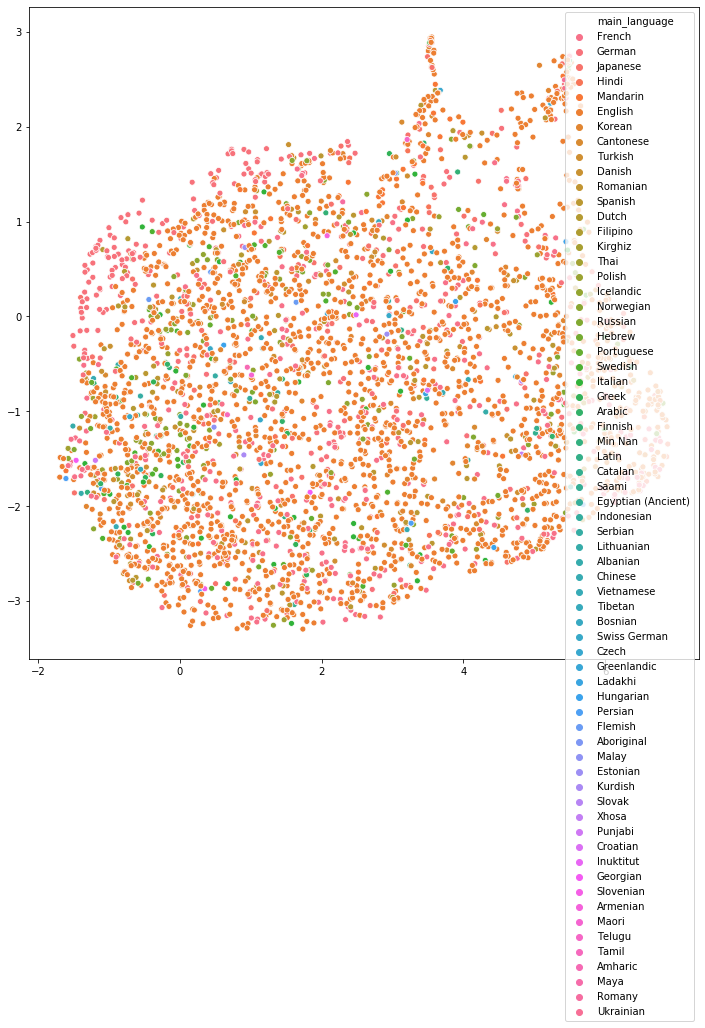

In [35]:
plt.figure(figsize=(12,12))
sns.scatterplot(Xr_tfidf[:,0], Xr_tfidf[:,1], hue=df['main_language'])
plt.show()

# Cluster Main Continent

### Divisional Main Continent  

In [36]:
tfidf = TfidfVectorizer(max_features=100)
tokens = tfidf.fit_transform(df_clean.text)


In [37]:
tokens.toarray(), tokens.shape

(array([[0.08444237, 0.01561686, 0.02935585, ..., 0.03394433, 0.02329053,
         0.1781093 ],
        [0.12505525, 0.03957431, 0.02796615, ..., 0.03072055, 0.01967333,
         0.07164168],
        [0.03910595, 0.02892918, 0.02862091, ..., 0.01429082, 0.02157207,
         0.13394817],
        ...,
        [0.05163668, 0.00350157, 0.01558916, ..., 0.01729752, 0.02262929,
         0.07509184],
        [0.05874277, 0.00919257, 0.02046289, ..., 0.03859907, 0.01028215,
         0.14001163],
        [0.08045383, 0.00935265, 0.03932519, ..., 0.03696115, 0.03719539,
         0.06837588]]),
 (3641, 100))

In [27]:
models = KMeans(n_clusters=7)
models.fit(tokens)

KeyboardInterrupt: 

In [38]:
len(models.labels_)

3641

In [28]:
import seaborn as sns
import umap

## K-Means

In [39]:
from umap import UMAP 
reducer = UMAP()
Xrr_tfidf = reducer.fit_transform(tokens)

In [40]:
plt.figure(figsize =(13,13))
plt.scatter(Xrr_tfidf[:, 0], Xrr_tfidf[:, 1], c=y_kmeans, s=10, cmap=plt.cm.Paired)

NameError: name 'y_kmeans' is not defined

<Figure size 936x936 with 0 Axes>

In [ ]:
centers = kmeans.cluster_centers_

In [ ]:
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5)

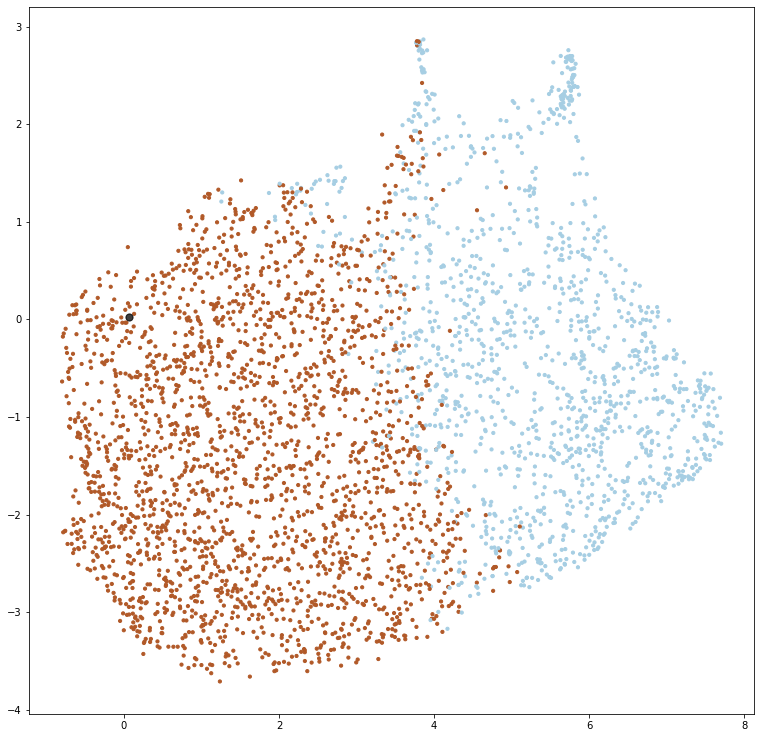

In [41]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(tokens)
y_kmeans = kmeans.predict(tokens)


from umap import UMAP 
reducer = UMAP()
Xrr_tfidf = reducer.fit_transform(tokens)

plt.figure(figsize =(13,13))
plt.scatter(Xrr_tfidf[:, 0], Xrr_tfidf[:, 1], c=y_kmeans, s=10, cmap=plt.cm.Paired)

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5)

### GMM

In [ ]:
tfidf = TfidfVectorizer(max_features=1000)
tokens_2var = tfidf.fit_transform(dfs_2var.text)
gmm = mixture.GaussianMixture(n_components=2, covariance_type='diag')
gmm_label = gmm.fit_predict(tokens_2var.toarray())
gmm.converged_

In [ ]:
gmm_label

In [ ]:
pca = PCA(n_components=2)
pca.fit(tokens_2var.todense())
X_tf = pca.transform(tokens_2var.todense())

#Abspeichern der Zwischenergebnisste im Datafram
dfs_2var['gmm1'] = X_tf[:,0]
dfs_2var['gmm2'] = X_tf[:,1]
dfs_2var['gmmlabel'] = gmm_label
print('Comedy, Crime, Drama in rot VS Comedy, Horror in blau')
#Plotten anhand der gespeicherten Zwischenergebnisse 
plt.figure(figsize=(15,8))
for d in dfs_2var.iterrows():
    x = d[1].gmm1
    y = d[1].gmm2    
    plt.plot(x, y, 'o', markersize=14, color= d[1].labelcolor2var)
    plt.plot(x, y, marker=TextPath((-3, -3), f'{d[1].gmmlabel}'), color='white', markersize=12)

In [ ]:
df['labelcolor']=colorlist

In [ ]:
North_AmericaValue = 'North America'
EuropeValue = 'Europe'
North_America = df.production_continent = North_AmericaValue
Europe = df.production_continent = EuropeValue
production_continents = North_AmericaValue + EuropeValue
colorlist = []

for x in df.production_region:
    if x =='North America':
        colorlist.append('red')
    elif x =='Europe':
        colorlist.append('blue')
    else: 
        colorlist.append('white')

In [ ]:
pd.value_counts(dfs.colors).plot.bar() 
pd.value_counts(dfs.colors)

# Split without Embedding
